In [1]:
from anchor import utils
from anchor import anchor_tabular
import pandas as pd
import sklearn.ensemble
import numpy as np
from anchor import anchor_tabular
import os

In [2]:
dataset_folder = '../../../datasets/diabetes/'
target_idx = 8
balance = True
#features_to_use = [0, 1, 2, 3, 4, 5, 6, 7]
features_to_use = [2, 3, 4, 5, 6]
feature_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
dataset = utils.load_csv_dataset(
            os.path.join(dataset_folder, 'diabetes.csv'), target_idx, ',',
            feature_names=feature_names, features_to_use=features_to_use, 
            discretize=True, balance=balance, skip_first=True)
            
print(dataset.train[2])

[0. 1. 3. 0. 3.]


In [6]:
import sys
sys.path.append(sys.path[0] + '/../..')

import arg_explainer as ae
import dataset_manager
import testbench
import utils

nb_rows = 100
experiment_name = 'diabetesshort'
dm = dataset_manager.DatasetManager(dataset, classifier=None, nb_rows=nb_rows)
print('Space size =', dm.space_size())
explainer = ae.ArgTabularExplainer(dm, experiment_name + '_' + str(nb_rows), compute=True, output_path='../../saves')
tb = testbench.Testbench(dm, exp_name=experiment_name)

tb.explore_full_dataset(8)
# tb.explore_neighborhoods(8)

Train 0.94
Test 0.7037037037037037
Space size = 1024
diabetesshort_100
Generating arguments
len  1 : 1 ,  0
20 potential arg checked ( 0 not minimal)
len  2 : 19 ,  7
141 potential arg checked ( 8 not minimal)
len  3 : 56 ,  90
265 potential arg checked ( 147 not minimal)
len  4 : 5 ,  1
27 potential arg checked ( 308 not minimal)
len  5 : 0 ,  0
0 potential arg checked ( 79 not minimal)
Total number of arguments:  179
Saving to  ../../saves\diabetesshort_100_minimals.df
diabetesshort_128_fullsynth
Generating arguments
len  1 : 0 ,  0
20 potential arg checked ( 0 not minimal)
len  2 : 17 ,  10
160 potential arg checked ( 0 not minimal)
len  3 : 84 ,  95
345 potential arg checked ( 210 not minimal)
len  4 : 7 ,  4
38 potential arg checked ( 485 not minimal)
len  5 : 0 ,  0
0 potential arg checked ( 128 not minimal)
Total number of arguments:  217
Saving to  ../../saves\diabetesshort_128_fullsynth_minimals.df
total args: 217
edges per node: 12.949308755760368
diabetesshort_256_fullsynth


In [5]:
import networkx as nx

dm = dataset_manager.DatasetManager(dataset, classifier=None, nb_rows=None)
c = dm.get_classifier()

for nb_rows in utils.make_slices(dm.get_nb_rows(), 10):
    dm = dataset_manager.DatasetManager(dataset, classifier=c, nb_rows=nb_rows)
    explainer = ae.ArgTabularExplainer(dm, 'diabetesshort_' + str(nb_rows), compute=True, output_path='../../saves', verbose=False)
    G = explainer.build_attack_graph(compute=True, display_graph=False)
    print('edges per node:', np.mean([len(G.edges(n)) for n in G.nodes()]))
    print('nodes:', len(G.nodes()))
    print('edges:', len(G.edges()))
    #print('naive extensions:', nx.graph_number_of_cliques(nx.complement(G)))

Train 0.8785046728971962
Test 0.6851851851851852
diabetesshort_42
Total number of arguments:  107
Saving to  ../../saves\diabetesshort_42_minimals.df
edges per node: 15.02803738317757
nodes: 107
edges: 804
diabetesshort_84
Total number of arguments:  146
Saving to  ../../saves\diabetesshort_84_minimals.df
edges per node: 13.547945205479452
nodes: 146
edges: 989
diabetesshort_126
Total number of arguments:  192
Saving to  ../../saves\diabetesshort_126_minimals.df
edges per node: 11.708333333333334
nodes: 192
edges: 1124
diabetesshort_168
Total number of arguments:  208
Saving to  ../../saves\diabetesshort_168_minimals.df
edges per node: 10.23076923076923
nodes: 208
edges: 1064
diabetesshort_210
Total number of arguments:  215
Saving to  ../../saves\diabetesshort_210_minimals.df
edges per node: 8.874418604651163
nodes: 215
edges: 954
diabetesshort_252
Total number of arguments:  209
Saving to  ../../saves\diabetesshort_252_minimals.df
edges per node: 8.009569377990431
nodes: 209
edges: 8

[0, 1362, 1161, 926, 751, 522, 225, 106]
ninst: (128, 256, 384, 512, 640, 768, 896, 1024)
nargs: (229, 276, 304, 339, 345, 321, 326, 304)


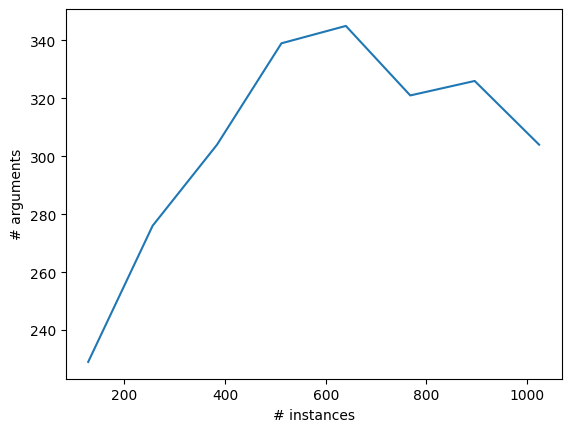

ninst: (128, 256, 384, 512, 640, 768, 896, 1024)
natk: (1362, 1161, 926, 751, 522, 225, 106, 0)


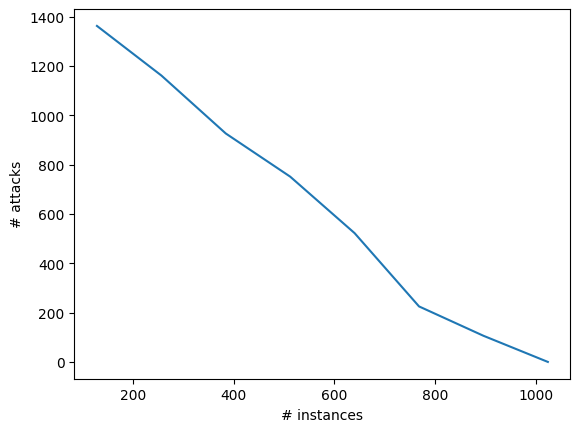

nargs: (229, 276, 304, 304, 321, 326, 339, 345)
ninst: (1362, 1161, 0, 926, 225, 106, 751, 522)


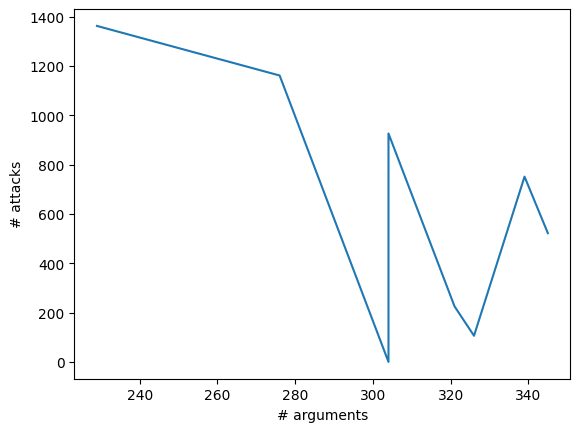

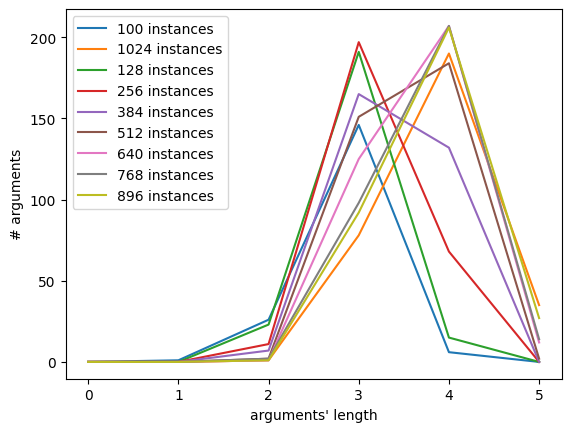

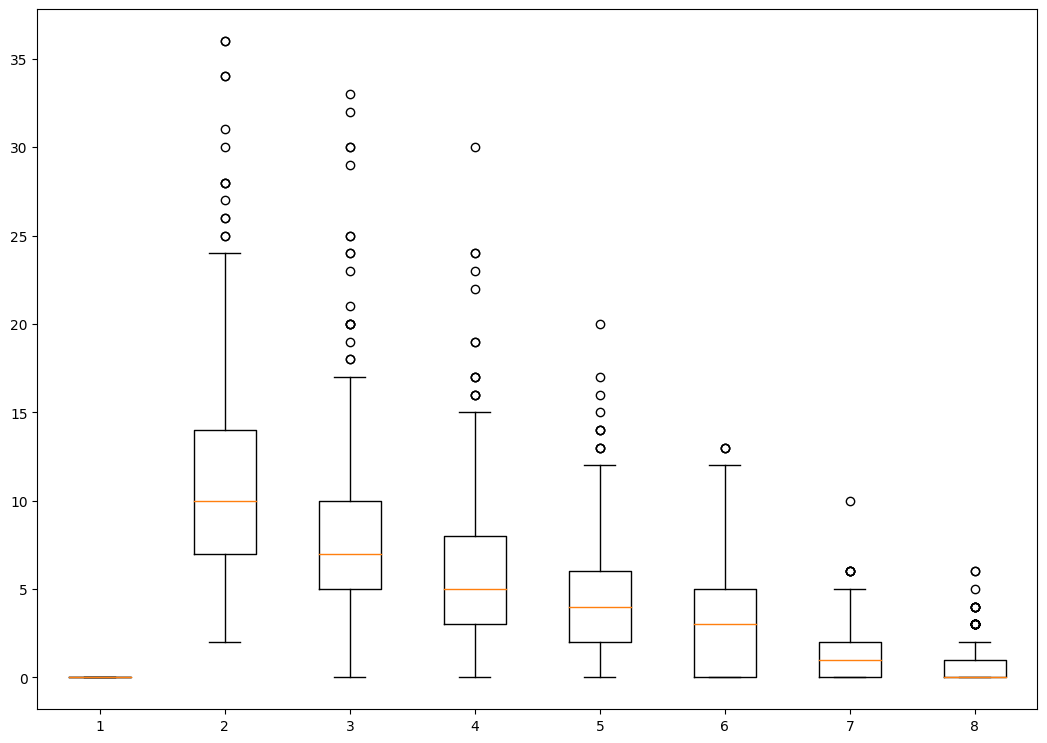

(1024, 896, 768, 640, 512, 384, 256, 128) (1.0, 0.6319018404907976, 0.3800623052959502, 0.2666666666666667, 0.0943952802359882, 0.02960526315789469, 0.007246376811594235, 0.0)


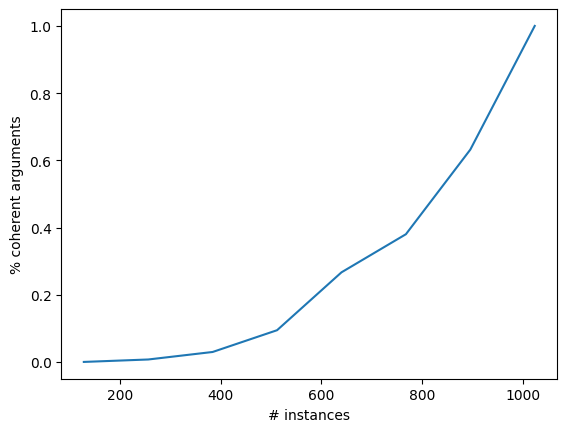

In [11]:
explainer.af_analysis(remove=[ 'fullsynth'])

In [ ]:
G = explainer.build_attack_graph(compute=True, display_graph=False)
print('edges per node:', np.mean([len(G.edges(n)) for n in G.nodes()]))

explainer.export_graph('asp', '../../saves')
print(len(G.nodes()))

diabetesshort_50
edges per node: 14.61111111111111
108
